In [1]:
import pandas as pd
import numpy as np

In [2]:
# создадим несколько списков и массивов Numpy с информацией о семи странах мира
country = np.array(['China', 'Vietnam', 'United Kingdom', 'Russia', 'Argentina', 'Bolivia', 'South Africa'])
capital = ['Beijing', 'Hanoi', 'London', 'Moscow', 'Buenos Aires', 'Sucre', 'Pretoria']
population = [1400, 97, 67, 144, 45, 12, 59] # млн. человек
area = [9.6, 0.3, 0.2, 17.1, 2.8, 1.1, 1.2] # млн. кв. км.
sea = [1] * 5 + [0, 1] # выход к морю (в этом списке его нет только у Боливии)
 
# кроме того создадим список кодов стран, которые станут индексом датафрейма
custom_index = ['CN', 'VN', 'GB', 'RU', 'AR', 'BO', 'ZA']
 
# создадим пустой словарь
countries_dict = {}
 
# превратим эти списки в значения словаря,
# одновременно снабдив необходимыми ключами
countries_dict['country'] = country
countries_dict['capital'] = capital
countries_dict['population'] = population
countries_dict['area'] = area
countries_dict['sea'] = sea
 
# создадим датафрейм
countries = pd.DataFrame(countries_dict, index = custom_index)
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


### __Копирование DataFrame__

__Метод .copy()__

In [3]:
# Вначале создадим копию датафрейма с помощью простого присвоения этого объекта новой переменной.
countries_new = countries

In [4]:
# удалим строку с данными про Аргентину и выведем исходный DataFrame
countries_new.drop(labels = 'AR', axis = 0, inplace = True)
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


__inplace__

In [5]:
df = pd.DataFrame([[1, 1, 1],
                   [2, 2, 2],
                   [3, 3, 3]],
                  columns = ['A', 'B', 'C'])

df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [6]:
# попробуем удалить столбец A
df.drop(labels = ['A'], axis = 1, inplace = False)

,B,C
0,1,1
1,2,2
2,3,3


In [7]:
# проверим сохранилось ли изменение 
df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [8]:
# если метод выдает None, изменение постоянно
# изменим параметр inplace на True 
df.drop(labels = ['A'], axis = 1, inplace = True)

In [9]:
df

,B,C
0,1,1
1,2,2
2,3,3


In [10]:
# нельзя использовать inplace = True, и записывать результат в переменную одновременно
df = df.drop(labels = ['B'], axis = 1, inplace = True)
print(df)

None


### __Столбцы DataFrame__

__Именнование столбцов при создании DataFrame__

In [11]:
# создадим список с названиями столбцов на кириллице
custom_columns = ['страна', 'столица', 'население', 'площадь', 'море']

arr = np.array([country, capital, population, area, sea]).T
arr

array([['China', 'Beijing', '1400', '9.6', '1'],
       ['Vietnam', 'Hanoi', '97', '0.3', '1'],
       ['United Kingdom', 'London', '67', '0.2', '1'],
       ['Russia', 'Moscow', '144', '17.1', '1'],
       ['Argentina', 'Buenos Aires', '45', '2.8', '1'],
       ['Bolivia', 'Sucre', '12', '1.1', '0'],
       ['South Africa', 'Pretoria', '59', '1.2', '1']], dtype='<U32')

In [12]:
# создадим датафрейм 
countries = pd.DataFrame(data = arr,
                         index = custom_index,
                         columns = custom_columns)

countries

,страна,столица,население,площадь,море
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [13]:
# вернем прежние названия столбцов
countries.columns = ['country', 'capital', 'population', 'area', 'sea']

In [14]:
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


__Переименование столбцов__

In [15]:
# переименуем столбец capital на city 
countries.rename(columns = {'capital' : 'city'}, inplace = True)
countries

,country,city,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


__Тип данных в столбце__

In [16]:
countries.dtypes

country       object
city          object
population    object
area          object
sea           object
dtype: object

__Изменение типа данных__

In [17]:
countries = countries.astype({'area' : 'float', 'sea' : 'category', 'population' : 'int64'})

In [18]:
countries.dtypes

country         object
city            object
population       int64
area           float64
sea           category
dtype: object

__Тип данных category__ 

In [19]:
countries.sea

CN    1
VN    1
GB    1
RU    1
AR    1
BO    0
ZA    1
Name: sea, dtype: category
Categories (2, object): ['0', '1']

__Фильтр столбцов по типу данных__

In [20]:
# выберем только типы данных int и float 
countries.select_dtypes(include = ['int64', 'float64'])

,population,area
CN,1400,9.6
VN,97,0.3
GB,67,0.2
RU,144,17.1
AR,45,2.8
BO,12,1.1
ZA,59,1.2


In [21]:
# выберем все типы кроме object и category 
countries.select_dtypes(exclude = ['object', 'category'])

,population,area
CN,1400,9.6
VN,97,0.3
GB,67,0.2
RU,144,17.1
AR,45,2.8
BO,12,1.1
ZA,59,1.2


### __Добавление строк и столбцов__

__Добавление строк__

__Метод .append() + словарь__

In [22]:
# создадим словарь с данными Канады и добавим его в DataFrame
dict_ = {'country': 'Canada', 'city': 'Ottawa', 'population': 38, 'area': 10, 'sea': '1'}

# словарь можно добавлять только если ignore_index = True
countries = countries._append(dict_, ignore_index = True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1


__Метод .append() + Series__

In [23]:
# причем, если передать список из Series, можно добавить сразу несколько строк
list_of_series = [pd.Series(['Spain', 'Madrid', 47, 0.5, 1], index = countries.columns),
                  pd.Series(['Netherlands', 'Amsterdam', 17, 0.04, 1], index = countries.columns)]
 
# нам по-прежнему необходим параметр ignore_index = True
# countries._append(list_of_series, ignore_index = True)
countries = pd.concat([countries, pd.DataFrame(list_of_series)], ignore_index=True)

countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Argentina,Buenos Aires,45,2.80,1
5,Bolivia,Sucre,12,1.10,0
6,South Africa,Pretoria,59,1.20,1
7,Canada,Ottawa,38,10.00,1
8,Spain,Madrid,47,0.50,1
9,Netherlands,Amsterdam,17,0.04,1


__Метод .append() + другой DataFrame__

In [24]:
peru = pd.DataFrame({'country': 'Peru',
                     'city': 'Lima',
                     'population': [33],
                     'area': [1.3],
                     'sea': [1]})

peru

,country,city,population,area,sea
0,Peru,Lima,33,1.3,1


In [25]:
# перед добавлением выберем первую строку с помощью метода .iloc[]
countries._append(peru.iloc[0], ignore_index = True)

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Argentina,Buenos Aires,45,2.80,1
5,Bolivia,Sucre,12,1.10,0
6,South Africa,Pretoria,59,1.20,1
7,Canada,Ottawa,38,10.00,1
8,Spain,Madrid,47,0.50,1
9,Netherlands,Amsterdam,17,0.04,1


__Использование .iloc[]__

Если вновь вывести то увидим что данные о перу не сохранились

In [26]:
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Argentina,Buenos Aires,45,2.80,1
5,Bolivia,Sucre,12,1.10,0
6,South Africa,Pretoria,59,1.20,1
7,Canada,Ottawa,38,10.00,1
8,Spain,Madrid,47,0.50,1
9,Netherlands,Amsterdam,17,0.04,1


In [27]:
# добавим данные об этих странах на постоянной основе с помощью метода 
# .iloc[] и посмотрим на результат
countries.iloc[9] = ['Peru', 'Lima', 33, 1.3, 1]

countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1
8,Spain,Madrid,47,0.5,1
9,Peru,Lima,33,1.3,1


В версии Pandas 2.0.0, которая была опубликована 3 апреля 2023 года, метод .append() был удален, и применение нижнего подчеркивания, хотя и позволяет выполнить присоединение строк, не является удачным решением.

### __Добавление столбцов__

__Объявление нового столбца__

In [28]:
# добавим столбец с данными о плотности населения
countries['pop_density'] = [153, 49, 281, 9, 17, 94, 508, 26, 32, 43]
countries

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.6,1,153
1,Vietnam,Hanoi,97,0.3,1,49
2,United Kingdom,London,67,0.2,1,281
3,Russia,Moscow,144,17.1,1,9
4,Argentina,Buenos Aires,45,2.8,1,17
5,Bolivia,Sucre,12,1.1,0,94
6,South Africa,Pretoria,59,1.2,1,508
7,Canada,Ottawa,38,10.0,1,26
8,Spain,Madrid,47,0.5,1,32
9,Peru,Lima,33,1.3,1,43


__Метод .insert()__


In [29]:
# добавим еще один столбец
countries.insert(loc = 1, # это будет второй по счету столбец
                 column = 'code',
                 value = ['CN', 'VN', 'GB', 'RU', 'AR', 'BL', 'SA', 'CA', 'ES', 'PE'])

In [30]:
countries

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.6,1,153
1,Vietnam,VN,Hanoi,97,0.3,1,49
2,United Kingdom,GB,London,67,0.2,1,281
3,Russia,RU,Moscow,144,17.1,1,9
4,Argentina,AR,Buenos Aires,45,2.8,1,17
5,Bolivia,BL,Sucre,12,1.1,0,94
6,South Africa,SA,Pretoria,59,1.2,1,508
7,Canada,CA,Ottawa,38,10.0,1,26
8,Spain,ES,Madrid,47,0.5,1,32
9,Peru,PE,Lima,33,1.3,1,43


__Метод .assign()__

In [31]:
countries = countries.assign(area_miles = countries.area / 2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [32]:
# удалим этот столбец, что бы рассмотреть другие методы
countries.drop(labels = 'area_miles', axis = 1, inplace = True)

Можно усложнить код и добиться такого же результата, применив методы .iterrows() и .iloc[].

In [33]:
# выведем индекс и содержание строк
for index, row in countries.iterrows():
    # запишем для каждой строки (штвуч) в новый столбец округленное значение в милях
    countries.loc[index, 'area_miles'] = np.round(row.area / 2.59, 2)

countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [34]:
# снова удалим этот столбец
countries.drop(labels = 'area_miles', axis = 1, inplace = True)

In [35]:
countries.head(3)

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.6,1,153
1,Vietnam,VN,Hanoi,97,0.3,1,49
2,United Kingdom,GB,London,67,0.2,1,281


In [36]:
# есть более просто способ добавления нового столбца
countries['area_miles'] = (countries.area /2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


### __Удаление строк и столбцов__

__Удаление строк__

In [37]:
# удалим строки по индексу с помощью метода .drop()
countries.drop(labels = [0, 1], axis = 0)

,country,code,city,population,area,sea,pop_density,area_miles
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [38]:
# удалим строки с индексом 5 и 7
countries.drop(index = [5, 7])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [39]:
# мы так же можем в параметр index передать индекс датафрейма через атрибут index
countries.drop(index = countries.index[4])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [40]:
# с атрибутом датафрейма index мы можем делать срезы
# удалим каждую вторую строку, начиная с четвертой с конца
countries.drop(index = countries.index[-4::2])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
9,Peru,PE,Lima,33,1.3,1,43,0.50


__Удаление столбцов__

In [41]:
countries.drop(labels = ['area_miles', 'code'], axis = 1)

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.6,1,153
1,Vietnam,Hanoi,97,0.3,1,49
2,United Kingdom,London,67,0.2,1,281
3,Russia,Moscow,144,17.1,1,9
4,Argentina,Buenos Aires,45,2.8,1,17
5,Bolivia,Sucre,12,1.1,0,94
6,South Africa,Pretoria,59,1.2,1,508
7,Canada,Ottawa,38,10.0,1,26
8,Spain,Madrid,47,0.5,1,32
9,Peru,Lima,33,1.3,1,43


In [42]:
# аналогичный результат можно получить передав список удаляемых столбцов в параметр columns
countries.drop(columns = ['area_miles', 'code'])

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.6,1,153
1,Vietnam,Hanoi,97,0.3,1,49
2,United Kingdom,London,67,0.2,1,281
3,Russia,Moscow,144,17.1,1,9
4,Argentina,Buenos Aires,45,2.8,1,17
5,Bolivia,Sucre,12,1.1,0,94
6,South Africa,Pretoria,59,1.2,1,508
7,Canada,Ottawa,38,10.0,1,26
8,Spain,Madrid,47,0.5,1,32
9,Peru,Lima,33,1.3,1,43


In [43]:
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.6,1,153,3.71
1,Vietnam,VN,Hanoi,97,0.3,1,49,0.12
2,United Kingdom,GB,London,67,0.2,1,281,0.08
3,Russia,RU,Moscow,144,17.1,1,9,6.60
4,Argentina,AR,Buenos Aires,45,2.8,1,17,1.08
5,Bolivia,BL,Sucre,12,1.1,0,94,0.42
6,South Africa,SA,Pretoria,59,1.2,1,508,0.46
7,Canada,CA,Ottawa,38,10.0,1,26,3.86
8,Spain,ES,Madrid,47,0.5,1,32,0.19
9,Peru,PE,Lima,33,1.3,1,43,0.50


In [44]:
# удалим последний столбец
countries.drop(columns = countries.columns[-1])

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.6,1,153
1,Vietnam,VN,Hanoi,97,0.3,1,49
2,United Kingdom,GB,London,67,0.2,1,281
3,Russia,RU,Moscow,144,17.1,1,9
4,Argentina,AR,Buenos Aires,45,2.8,1,17
5,Bolivia,BL,Sucre,12,1.1,0,94
6,South Africa,SA,Pretoria,59,1.2,1,508
7,Canada,CA,Ottawa,38,10.0,1,26
8,Spain,ES,Madrid,47,0.5,1,32
9,Peru,PE,Lima,33,1.3,1,43


In [45]:
# удалим пятую строку и несколько столбцов и сохраним изменения
countries.drop(index = 4, inplace = True)
countries.drop(columns = ['code', 'pop_density', 'area_miles'], inplace = True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1
8,Spain,Madrid,47,0.5,1
9,Peru,Lima,33,1.3,1


__Удаление по многоуровневому индексу__


In [46]:
# создадим несколько списков и массивов Numpy с информацией о семи странах мира
country = np.array(['China', 'Vietnam', 'United Kingdom', 'Russia', 'Argentina', 'Bolivia', 'South Africa'])
capital = ['Beijing', 'Hanoi', 'London', 'Moscow', 'Buenos Aires', 'Sucre', 'Pretoria']
population = [1400, 97, 67, 144, 45, 12, 59] # млн. человек
area = [9.6, 0.3, 0.2, 17.1, 2.8, 1.1, 1.2] # млн. кв. км.
sea = [1] * 5 + [0, 1] # выход к морю (в этом списке его нет только у Боливии)
 
# кроме того создадим список кодов стран, которые станут индексом датафрейма
custom_index = ['CN', 'VN', 'GB', 'RU', 'AR', 'BO', 'ZA']
 
# создадим пустой словарь
countries_dict = {}
 
# превратим эти списки в значения словаря,
# одновременно снабдив необходимыми ключами
countries_dict['country'] = country
countries_dict['capital'] = capital
countries_dict['population'] = population
countries_dict['area'] = area
countries_dict['sea'] = sea
 
# создадим датафрейм
countries = pd.DataFrame(countries_dict, index = custom_index)

# подготовим данные для многоуровневого индекса строк
rows = [('Asia', 'CN'),
        ('Asia', 'VN'),
        ('Europe', 'GB'),
        ('Europe', 'RU'),
        ('Europe', 'ES'),
        ('Europe', 'NL'),
        ('S. America', 'PE')]
 
# и столбцов
cols = [('names', 'country'),
        ('names', 'city'),
        ('data', 'population'),
        ('data', 'area'),
        ('data', 'sea')]

# создадим многоуровневый (иерархический) индекс
# для индекса строк добавим названия столбцов индекса через параметр names
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['region', 'code'])
custom_multicols = pd.MultiIndex.from_tuples(cols)
 
# поместим индексы в атрибуты index и columns датафрейма
countries.index = custom_multindex
countries.columns = custom_multicols
 
# посмотрим на результат
countries

names                     data          
                        country          city population  area sea
region     code                                                   
Asia       CN             China       Beijing       1400   9.6   1
           VN           Vietnam         Hanoi         97   0.3   1
Europe     GB    United Kingdom        London         67   0.2   1
           RU            Russia        Moscow        144  17.1   1
           ES         Argentina  Buenos Aires         45   2.8   1
           NL           Bolivia         Sucre         12   1.1   0
S. America PE      South Africa      Pretoria         59   1.2   1

__Удаление строк__

In [47]:
# удалим азиатский регион
# Воспользуемся методом .drop(), которому передадим параметр labels = 'Asia', укажем удаляем строки axis = 0,
# а так же укажем что Азия находится в индексе по названием region (level = 0)
countries.drop(labels = 'Asia', axis = 0, level = 0)

names                     data          
                        country          city population  area sea
region     code                                                   
Europe     GB    United Kingdom        London         67   0.2   1
           RU            Russia        Moscow        144  17.1   1
           ES         Argentina  Buenos Aires         45   2.8   1
           NL           Bolivia         Sucre         12   1.1   0
S. America PE      South Africa      Pretoria         59   1.2   1

In [48]:
# удалим запись о России по ее индексу в столбце code (т.е. level = 1)
countries.drop(index = 'RU', level = 1)

names                     data         
                        country          city population area sea
region     code                                                  
Asia       CN             China       Beijing       1400  9.6   1
           VN           Vietnam         Hanoi         97  0.3   1
Europe     GB    United Kingdom        London         67  0.2   1
           ES         Argentina  Buenos Aires         45  2.8   1
           NL           Bolivia         Sucre         12  1.1   0
S. America PE      South Africa      Pretoria         59  1.2   1

__Удаление столбцов__ 

In [49]:
 # Передадим методу .drop() параметры labels, level и axis = 1 для удаления столбца по его наименованию (labels) на нужном нам уровне (level) индекса.


In [50]:
# удалим все столбцы в разделе names на нулевом уровне индекса столбцов
countries.drop(labels = 'names', level = 0, axis = 1)

data          
                population  area sea
region     code                     
Asia       CN         1400   9.6   1
           VN           97   0.3   1
Europe     GB           67   0.2   1
           RU          144  17.1   1
           ES           45   2.8   1
           NL           12   1.1   0
S. America PE           59   1.2   1

In [51]:
# удалим столбцы city и area на втором уровне индекса (level - 1)
countries.drop(columns = ['city', 'area'], level = 1)

names       data    
                        country population sea
region     code                               
Asia       CN             China       1400   1
           VN           Vietnam         97   1
Europe     GB    United Kingdom         67   1
           RU            Russia        144   1
           ES         Argentina         45   1
           NL           Bolivia         12   0
S. America PE      South Africa         59   1

### __Применение функций__

In [52]:
people = pd.DataFrame({'name': ['Алексей', 'Иван', 'Анна', 'Ольга', 'Николай'],
                       'gender': [1, 1, 0, 2, 1],
                       'age': [35, 20, 13, 28, 16],
                       'height': [180.46, 182.26, 165.12, 168.04, 178.68],
                       'weight': [73.61, 75.34, 50.22, 52.14, 69.72],
                      })

people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


__Метод .map()__

In [53]:
# map это карта представляющая собой питоновский словарь, где ключи старые данные, а значения - новые
gender_map = {0: 'female', 1: 'male'}
people['gender'] = people['gender'].map(gender_map)

people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


В метод .map() мы можем передать и lambda-функцию.


In [54]:
# например, для того, чтобы выявить совершеннолетних и несовершеннолетних людей
people['age_group'] = people['age'].map(lambda x: 'adult' if x >= 18 else 'minor')
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [55]:
# удалим только что созданный столбец age_group
people.drop(labels = 'age_group', axis = 1, inplace = True)
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


In [56]:
# для более сложных преобразований можно использовать обычную функцию
def get_age_group(age):
    threshold = 18
    if age >= threshold:
        age_group = 'adult'
    else:
        age_group = 'minor'
    
    return age_group

In [57]:
people['age_group'] = people['age'].map(get_age_group)
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [58]:
# удалим созданный столбец
people.drop(labels = 'age_group', axis = 1, inplace = True)
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


__Функция np.where()__

In [59]:
# Такой же результат мы получим применив функцию np.where()
# внутри функции три параметра (1) условие, (2) значение если True, (3) значение если False
people['age_group'] = np.where(people['age'] >= 18, 'adult', 'minor')
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [60]:
# удалим созданный столбец
people.drop(labels = 'age_group', axis = 1, inplace = True)

In [61]:
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


__Метод .where()__

Метод .where() библиотеки Pandas действует немного иначе. В нем мы прописываем условие, которое хотим применить к отдельному столбцу или всему датафрейму.

Если условие выполняется (т.е. оценивается как True), мы сохраняем текущее значение датафрейма.
Если условие не выполняется (False), то значение заменяется на новое, указанное в методе .where().


In [62]:
# заменим возраст тех, кому меньше 18 на Nan 
people.age.where(people.age >= 18, other = np.nan)

0    35.0
1    20.0
2     NaN
3    28.0
4     NaN
Name: age, dtype: float64

In [63]:
# создадим матрицу из вложенных списков
nums_matrix = [[-13, 7, 1],
               [4, -2, 25],
               [45, -3, 8]]

nums = pd.DataFrame(nums_matrix)
nums

,0,1,2
0,-13,7,1
1,4,-2,25
2,45,-3,8


In [64]:
nums.where(nums > 0, other = -nums)

,0,1,2
0,13,7,1
1,4,2,25
2,45,3,8


__Метод .applay()__

В отличие от .map(), метод .apply() позволяет передавать именованные аргументы в применяемую функцию.



In [65]:
# Объявим функцию, которй можно передать не только значение возраста, но и порог при котором будем считать совершеннолетним
def get_age_group(age, threshold):
    if age >= int(threshold):
        age_group = 'adult'
    else:
        age_group = 'minor'

    return age_group

In [66]:
# применим эту функцию 
people['age_group'] = people['age'].apply(get_age_group, threshold = 21)

people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,minor
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


В метод .apply() можно передать уже имеющуюся в Питоне функцию, например, из библиотеки Numpy.



In [67]:
# заменим значение в столбцах height и weight на медиану по столбцам
people[['height', 'weight']] = people[['height', 'weight']].apply(np.median, axis = 0)
people

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_6076\282977442.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  people[['height', 'weight']] = people[['height', 'weight']].apply(np.median, axis = 0)


,name,gender,age,height,weight,age_group
0,Алексей,male,35,178.68,69.72,adult
1,Иван,male,20,178.68,69.72,minor
2,Анна,female,13,178.68,69.72,minor
3,Ольга,NaN,28,178.68,69.72,adult
4,Николай,male,16,178.68,69.72,minor


__Применение к строкам__

In [68]:
# создадим функцию индекса массы тела
def get_bmi(x):
    bmi = x['weight'] / (x['height'] / 100) ** 2
    return bmi

In [69]:
# для применения функции к строке используется параметр axis = 1
people['bmi'] = people.apply(get_bmi, axis = 1).round(2)
people

,name,gender,age,height,weight,age_group,bmi
0,Алексей,male,35,178.68,69.72,adult,21.84
1,Иван,male,20,178.68,69.72,minor,21.84
2,Анна,female,13,178.68,69.72,minor,21.84
3,Ольга,NaN,28,178.68,69.72,adult,21.84
4,Николай,male,16,178.68,69.72,minor,21.84


__Метод .applymap()__

Метод .applymap() позволяет применять функции с именованными аргументами ко всему датафрейму (метод .apply() применяется только к строкам или столбцам). Рассмотрим несложный пример.



In [70]:
nums_matrix = [[13, 7, 1],
               [4, 2, 25],
               [45, 3, 8]]

nums = pd.DataFrame(nums_matrix)
nums

,0,1,2
0,13,7,1
1,4,2,25
2,45,3,8


In [71]:
# объявим функцию, которая на входе принимает число х и прибавляет число
def add_number(x, number):
    return x + number

In [72]:
# передадим методу .applymap() функцию
nums.applymap(add_number, number = 1)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_6076\145898310.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nums.applymap(add_number, number = 1)


,0,1,2
0,14,8,2
1,5,3,26
2,46,4,9


__Метод .pipe()__

Метод .pipe(), как следует из его названия, позволяет создать pipeline и последовательно применить несколько функций к датафрейму. Вновь создадим исходный датафрейм с параметрами нескольких людей.



In [73]:
people = pd.DataFrame({'name'        : ['Алексей', 'Иван', 'Анна', 'Ольга', 'Николай'],
                       'gender'      : [1, 1, 0, 2, 1],
                       'age'         : [35, 20, 13, 28, 16],
                       'height'      : [180.46, 182.26, 165.12, 168.04, 178.68],
                       'weight'      : [73.61, 75.34, 50.22, 52.14, 69.72]
                       })

people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


In [74]:
# объявим несколько функций, которые применим ко всему датафрейму
# скопируем DataFrame
def copy_df(df):
    return df.copy()

# заменим значения столбца на новые с помощью метода .map()
def map_columns(df, column, label1, label2):
    labels_map = {0: label1, 1: label2}
    df[column] = df[column].map(labels_map)
    return df
    
# создадим функцию для превращения количественной переменной в категориальную
def to_categorical(df, newcol, condcol, thres, cat1, cat2):
    df[newcol] = np.where(df[condcol] >= thres, cat1, cat2)
    return df

In [75]:
# последовательно применим эти функции с помощью нескольких методов .pipe()
people_processed = (people.
                    pipe(copy_df).
                    pipe(map_columns, 'gender', 'femail', 'mail').
                    pipe(to_categorical, 'age_group', 'age', 18, 'adult', 'minor'))

people_processed

,name,gender,age,height,weight,age_group
0,Алексей,mail,35,180.46,73.61,adult
1,Иван,mail,20,182.26,75.34,adult
2,Анна,femail,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,mail,16,178.68,69.72,minor


### __Соединение DataFrame__

__pd.concat()__ в функцию pd.concat() нельзя передать словарь, только объекты Series и DataFrame.



In [76]:
 s1 = pd.DataFrame({
     'item': ['карандаш', 'ручка', 'папка', 'степлер'],
     'price': [220, 340, 200, 500]
 })

s2 = pd.DataFrame({
    'item': ['клей', 'корректор', 'скрепка', 'бумага'],
    'price': [200, 240, 100, 300]
})

In [77]:
s1

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500


In [78]:
s2

,item,price
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


__pd.concat()__

In [79]:
# передадим в функцию pd.concat()
pd.concat([s1, s2], axis = 0)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [80]:
# обновим индекс через параметр ignore_index = True
pd.concat([s1, s2], axis = 0, ignore_index = True)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
4,клей,200
5,корректор,240
6,скрепка,100
7,бумага,300


In [81]:
# создадим многоуровневый (иерархический) индекс
# передадим в параметр keys названия групп индекса, параметр names получит названия уровней индекса
by_shop = pd.concat([s1, s2], axis = 0, keys = ['s1', 's2'], names = ['s', 'id'])
by_shop

item  price
s  id                  
s1 0    карандаш    220
   1       ручка    340
   2       папка    200
   3     степлер    500
s2 0        клей    200
   1   корректор    240
   2     скрепка    100
   3      бумага    300

In [82]:
# посмотрим на созданный индекс
by_shop.index 

MultiIndex([('s1', 0),
            ('s1', 1),
            ('s1', 2),
            ('s1', 3),
            ('s2', 0),
            ('s2', 1),
            ('s2', 2),
            ('s2', 3)],
           names=['s', 'id'])

In [83]:
# выведем первую запись в группе
by_shop.loc[('s1', 0)]

item     карандаш
price         220
Name: (s1, 0), dtype: object

In [84]:
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2'])

s1               s2      
       item price       item price
0  карандаш   220       клей   200
1     ручка   340  корректор   240
2     папка   200    скрепка   100
3   степлер   500     бумага   300

In [85]:
# выберем вторую группу с помощью .iloc[]
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2']).loc[:, 's2']

,item,price
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [86]:
# для транспонирования используем метод .T or .transpose()
pd.concat([s1, s2], axis = 1, keys = ['s1', 's2']).T

0          1        2        3
s1 item   карандаш      ручка    папка  степлер
   price       220        340      200      500
s2 item       клей  корректор  скрепка   бумага
   price       200        240      100      300

__pd.merge() and .join()__

In [87]:
math_dict = {
    'name': ['Андрей', 'Елена', 'Антон', 'Татьяна'],
    'math_score': [83, 84, 78, 80]
}

math_degree_dict = {
    'degree': ['B', 'M', 'B', 'M']
}

cs_dict = {
    'name': ['Андрей', 'Ольга', 'Евгений', 'Татьяна'],
    'cs_score': [87, 82, 77, 81]
}

math = pd.DataFrame(math_dict)
cs = pd.DataFrame(cs_dict)
math_degree = pd.DataFrame(math_degree_dict)

In [88]:
math

,name,math_score
0,Андрей,83
1,Елена,84
2,Антон,78
3,Татьяна,80


In [89]:
cs

,name,cs_score
0,Андрей,87
1,Ольга,82
2,Евгений,77
3,Татьяна,81


In [90]:
math_degree

,degree
0,B
1,M
2,B
3,M


__Left join__

In [91]:
# объединим два датафрейма в помощью merge
pd.merge(math, math_degree, # выполним слияние двух датафреймов
         how = 'left', # способом left join
         left_index = True, right_index = True) # по индексам левого и правого датафреймов

,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


In [92]:
# объединим два датафрейма в помощью join
math.join(math_degree)

,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


Здесь важно отметить, что главным является датафрейм слева. Другими словами, если в столбцах, по которым мы соединяем датафреймы есть расхождения, библиотека Pandas сохранит нетронутым левый датафрейм, а в правом — либо заполнит недостающие значения пропусками, либо удалит лишние строки.



In [93]:
# выполним left join по столбцу name
pd.merge(math, cs, how = 'left', on = 'name')

,name,math_score,cs_score
0,Андрей,83,87.0
1,Елена,84,NaN
2,Антон,78,NaN
3,Татьяна,80,81.0


__Left exluding join__

In [94]:
pd.merge(math, cs, how = 'left', on = 'name', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83,87.0,both
1,Елена,84,NaN,left_only
2,Антон,78,NaN,left_only
3,Татьяна,80,81.0,both


In [95]:
# теперь с помощью метода .query() выберем только записи из левого датафрейма и удалим столбец _merge
pd.merge(math, cs, how = 'left', on = 'name', indicator = True) \
    .query('_merge == "left_only"').drop(columns = '_merge')

,name,math_score,cs_score
1,Елена,84,NaN
2,Антон,78,NaN


__Right join__

In [96]:
pd.merge(math, cs, how = 'right', on = 'name')

,name,math_score,cs_score
0,Андрей,83.0,87
1,Ольга,NaN,82
2,Евгений,NaN,77
3,Татьяна,80.0,81


__Right excluding join__

In [97]:
pd.merge(math, cs, how = 'right', on = 'name', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87,both
1,Ольга,NaN,82,right_only
2,Евгений,NaN,77,right_only
3,Татьяна,80.0,81,both


In [98]:
# воспользуемся метод query()
pd.merge(math, cs, how = 'right', on = 'name', indicator = True) \
    .query('_merge == "right_only"').drop(columns = '_merge')

,name,math_score,cs_score
1,Ольга,NaN,82
2,Евгений,NaN,77


__Outer join__

In [99]:
pd.merge(math, cs, how = 'outer', on = 'name')

,name,math_score,cs_score
0,Андрей,83.0,87.0
1,Елена,84.0,NaN
2,Антон,78.0,NaN
3,Татьяна,80.0,81.0
4,Ольга,NaN,82.0
5,Евгений,NaN,77.0


__Full excluding join__

In [100]:
pd.merge(math, cs, how = 'outer', on = 'name', indicator = True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87.0,both
1,Елена,84.0,NaN,left_only
2,Антон,78.0,NaN,left_only
3,Татьяна,80.0,81.0,both
4,Ольга,NaN,82.0,right_only
5,Евгений,NaN,77.0,right_only


In [101]:
# оставим только те данные которых нет в обеих датафреймах
pd.merge(math, cs, how = 'outer', indicator = True) \
    .query('_merge != "both"') \
    .drop(columns = '_merge')

,name,math_score,cs_score
1,Елена,84.0,NaN
2,Антон,78.0,NaN
4,Ольга,NaN,82.0
5,Евгений,NaN,77.0


__Inner join__ Внутреннее соединение (inner join) сохраняет только те наблюдения, которые есть в обоих датафреймах.

In [102]:
pd.merge(math, cs, how = 'inner', on = 'name')

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


In [103]:
# по умолчанию merge выполняет inner join
pd.merge(math, cs)

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


Здесь нужно быть аккуратным, потому что если левый датафрейм был главным (его записи должны быть сохранены в обязательном порядке), использование pd.merge() с параметром по умолчанию (how = ‘inner’) вызовет потерю данных (лучше использовать left join).

__Соединение DataFrame и дубликаты__

In [104]:
product_data = pd.DataFrame([[1, 'холодильник'], [2, 'телевизор']], columns = ['code', 'product'])
price_data = pd.DataFrame([[1, 40000], [1, 60000]], columns = ['code', 'price']) 

In [105]:
product_data

,code,product
0,1,холодильник
1,2,телевизор


In [106]:
price_data

,code,price
0,1,40000
1,1,60000


In [107]:
pd.merge(product_data, price_data, how = 'left', on = 'code')

,code,product,price
0,1,холодильник,40000.0
1,1,холодильник,60000.0
2,2,телевизор,NaN


В результате мы получили данные о наименовании и цене товаров и так как у нас есть две цены для холодильника (и мы не знаем какая из них верная), оба этих значения вошли в финальный датафрейм. Вместо цены телевизора ожидаемо появился NaN.



__Другой пример__

In [108]:
 # создадим два DataFrame
exams_dict = {
    'professor': ['Погорельцев', 'Преображенский', 'Архангельский', 'Дятлов', 'Иванов'],
    'student': [101, 102, 103, 104, 101],
    'score': [83, 84, 78, 80, 82]
}

students_dict = {
    'student_id': [101, 102, 103, 104],
    'student': ['Андрей', 'Елена', 'Антон', 'Татьяна']
}

exams = pd.DataFrame(exams_dict)
students = pd.DataFrame(students_dict)

In [109]:
exams

,professor,student,score
0,Погорельцев,101,83
1,Преображенский,102,84
2,Архангельский,103,78
3,Дятлов,104,80
4,Иванов,101,82


In [110]:
students

,student_id,student
0,101,Андрей
1,102,Елена
2,103,Антон
3,104,Татьяна


In [111]:
# применим параметр по умолчанию how = inner join
pd.merge(exams, students, left_on = 'student', right_on = 'student_id')

,professor,student_x,score,student_id,student_y
0,Погорельцев,101,83,101,Андрей
1,Иванов,101,82,101,Андрей
2,Преображенский,102,84,102,Елена
3,Архангельский,103,78,103,Антон
4,Дятлов,104,80,104,Татьяна


__Cross join__

Перекрестное соединение (cross join) по своей сути представляет собой декартово произведение. В этом случае каждому элементу первого датафрейма ставится в соответствие каждый элемент второго.



In [112]:
# создадим DataFrame со столбцом ху и двумя значениями (х и у)
df_xy = pd.DataFrame({ 'xy': ['x', 'y']})
df_xy

,xy
0,x
1,y


In [113]:
# создадим еще один датафрейм со столбцом 123 и тремя значениями (1, 2 и 3)
df_123 = pd.DataFrame({'123': [1, 2, 3]})
df_123

,123
0,1
1,2
2,3


In [114]:
# С помощью параметра how = ‘cross’ мы можем поставить как значению x, так и значению y первого датафрейма каждый из элементов второго.
pd.merge(df_xy, df_123, how = 'cross')

,xy,123
0,x,1
1,x,2
2,x,3
3,y,1
4,y,2
5,y,3


In [115]:
# для сравнения объеденим right join
pd.merge(df_xy, df_123, how = 'right', left_index = True, right_index = True)

,xy,123
0,x,1
1,y,2
2,NaN,3


__pd.merge_asof()__ В некоторых случаях бывает нужно соединить датафреймы не по точному значению столбцов, а по ближайшему.

In [116]:
# создадим два DataFrame
trades = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.038',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048']),
    'ticker': ['MSFT', 'MSFT','GOOG', 'GOOG', 'AAPL'],
    'price': [51.95, 51.95,720.77, 720.92, 98.00],
    'quantity': [75, 155, 100, 100, 100]},
    columns = ['time', 'ticker', 'price', 'quantity'])

quotes = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.023',
                            '20160525 13:30:00.030',
                            '20160525 13:30:00.041',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.049',
                            '20160525 13:30:00.072',
                            '20160525 13:30:00.075']),
    'ticker': ['GOOG', 'MSFT', 'MSFT','MSFT', 'GOOG', 'AAPL', 'GOOG','MSFT'],
    'bid': [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
    'ask': [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03]},
    columns = ['time', 'ticker', 'bid', 'ask'])

In [117]:
# время сделки, тикер эмитента, цена и количество бумаг
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [118]:
# котировки бумаг в определенный момент времени
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [119]:
# выполним левое соедение merge_asof
pd.merge_asof(trades, quotes, 
              # по столбцу времени
              on = 'time',
              # но так чтобы совпадало значение столбца ticker
              by = 'ticker',
              # совпадение по времени должно составлять менее 10 миллисекунд
              tolerance = pd.Timedelta('10ms'))

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [120]:
# изменим некоторые параметры
pd.merge_asof(trades, quotes,
              on = 'time',
              by = 'ticker',
              # уменьшим интервал до пяти миллисекунд
              tolerance = pd.Timedelta('5ms'),
              # разрешим искать в предыдущих и будущих периодах
              direction = 'nearest')

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.99,52.00
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,97.99,98.01


### __Группировка__

__метод .groupby()__

In [121]:
titanic = pd.read_csv('D:/Pandas_classes/train/train.csv')

# оставим только некоторые столбцы
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [122]:
# посмотрим на размерность
titanic.shape

(891, 8)

In [123]:
# выполним группировку по столбцу sex 
titanic.groupby('Sex')

__атрибут ngroups()__

In [124]:
# атрибут ngroups позволяет узнать на сколько групп были разбиты данные
titanic.groupby('Sex').ngroups

2

__атрибут groups__

In [125]:
# атрибут groups выдает питоновский словарь в котором ключами будут названия групп, а значениями - индексы наблюдений
titanic.groupby('Sex').groups['female'][:5]

Index([1, 2, 3, 8, 9], dtype='int64')

__метод size()__

In [126]:
# метод size() выдает количество элементов в каждой группе
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

__метод .first()__

In [127]:
# метод .first() выдает первые встречающиеся наблюдения в каждой из групп
# результатом использования данного метода будет dataframe
titanic.groupby('Sex').first()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,1,1,38.0,1,0,71.2833,C
male,0,3,22.0,1,0,7.2500,S


__метод .get_group()__

In [128]:
# метод .get_group позволяет выбрать наблюдения только для одной группы 
titanic.groupby('Sex').get_group('male').head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


### __Агрегирование данных__

__Статистика по столбцам__

In [129]:
# посчитаем медианный возраст мужчин и женщин
titanic.groupby('Sex').Age.median().round(1)

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [130]:
# расчитаем среднее арифметическое по столбцам Age и Fare для каждого из классов
titanic.groupby('Pclass')[['Age', 'Fare']].mean().round(1)

,Age,Fare
Pclass,,
1,38.2,84.2
2,29.9,20.7
3,25.1,13.7


In [131]:
# если не указывать конкретные столбцы, статистический показатель будет расчитан для всего dataframe
# при этом среднее арифметическое не получится расчитать для категориальных признаков, их придется удалить
titanic.drop(columns = ['Sex', 'Embarked'], inplace = True)

titanic.groupby('Pclass').mean().round(1)

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.6,38.2,0.4,0.4,84.2
2,0.5,29.9,0.4,0.4,20.7
3,0.2,25.1,0.6,0.4,13.7


In [132]:
titanic = pd.read_csv('D:/Pandas_classes/train/train.csv')

# оставим только некоторые столбцы
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [133]:
# выполним группировку по двум признакам (Pclass and Sex)
# с расчетом количества наблюдений в каждой подгруппе по каждому столбцу
titanic.groupby(['Pclass', 'Sex']).count()

Survived  Age  SibSp  Parch  Fare  Embarked
Pclass Sex                                                
1      female        94   85     94     94    94        92
       male         122  101    122    122   122       122
2      female        76   74     76     76    76        76
       male         108   99    108    108   108       108
3      female       144  102    144    144   144       144
       male         347  253    347    347   347       347

In [134]:
titanic.groupby(['Pclass', 'Sex']).ngroups

6

__Метод .agg()__

In [135]:
# данный метод позволяет расчитать сразу несколько статистических показателей
titanic.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean']).round(1)

,max,min,count,median,mean
Sex,,,,,
female,63.0,0.8,261,27.0,27.9
male,80.0,0.4,453,29.0,30.7


In [136]:
# для удобства при группировке и расчете показателей столбцы можно переименовать
titanic.groupby('Sex').Age.agg(sex_max =('max'), sex_min = ('min'))

,sex_max,sex_min
Sex,,
female,63.0,0.75
male,80.0,0.42


In [137]:
# данный метод можно применять к нескольким столбцам
titanic.groupby('Sex')[['Age', 'Fare']].agg(['mean', 'median']).round(1)

Age         Fare       
        mean median  mean median
Sex                             
female  27.9   27.0  44.5   23.0
male    30.7   29.0  25.5   10.5

In [138]:
# кроме того можно применить данный метод ко всем столбцам одновременно
# удалим категориалььные признаки 
titanic.drop(columns = ['Embarked'], inplace = True)

titanic.groupby('Sex').agg(['mean', 'median']).round(1)

Survived        Pclass          Age        SibSp        Parch         \
           mean median   mean median  mean median  mean median  mean median   
Sex                                                                           
female      0.7    1.0    2.2    2.0  27.9   27.0   0.7    0.0   0.6    0.0   
male        0.2    0.0    2.4    3.0  30.7   29.0   0.4    0.0   0.2    0.0   

        Fare         
        mean median  
Sex                  
female  44.5   23.0  
male    25.5   10.5

In [139]:
# в качестве параметра метод .agg() может принимать и объявленную нами функцию
# объявим функцию, которая выдаст True, если средний возраст меньше 29 лет и False dj всех других
def below29(x):
    m = x.mean()
    return True if m <29 else False

# применим эту функцию к группам female and male через метод .agg()
titanic.groupby('Sex').Age.agg(['max', 'mean', below29])

,max,mean,below29
Sex,,,
female,63.0,27.915709,True
male,80.0,30.726645,False


### __Преобразование данных__

__Стандартизиция данных__ - из каждого значения вычитаем среднее арифметическое и делим на среднее квадратическое отклонение. В результате среднее значение становится равно нулю, а СКО - единице

In [140]:
# объявим lambda-функцию, которая стандартизирует данные
standartize = lambda x: (x - x.mean()) / x.std()

In [141]:
# сгруппируем данные о возрасте по полу пассажиров и применим функцию стандартизации
titanic.groupby('Sex').Age.apply(standartize)

Sex        
female  1      0.714684
        2     -0.135768
        3      0.502071
        8     -0.064897
        9     -0.986220
                 ...   
male    883   -0.185761
        884   -0.390146
        886   -0.253890
        889   -0.322018
        890    0.086751
Name: Age, Length: 891, dtype: float64

In [142]:
# сгруппируем данные по Pclass и найдем среднее в столбцах Age и Fare 
# метод .apply() выдаст только агрегированные данные 
# для применения функции со столбцам укажем axis = 0
titanic.groupby('Pclass')[['Age', 'Fare']].apply(np.mean, axis = 0).round(1)

,Age,Fare
Pclass,,
1,38.2,84.2
2,29.9,20.7
3,25.1,13.7


Примечание. Обратим внимание, что для расчета среднего арифметического по столбцам нужно указывать именно axis = 0. В других методах, например, в методе .drop() такое значение аргумента подразумевает работу со строками.

Логика разработчиков в данном случае заключается в том, что при axis = 0 мы применяем np.mean() вдоль индекса (т.е. по всему столбцу), а это, как мы знаем, нулевая ось. Если же мы хотим применить к строке, то нужно идти вдоль столбца, axis = 1.

In [143]:
# убедимся в этом, заменив axis = 0 на axis = 'index'
titanic.groupby('Pclass')[['Age', 'Fare']].apply(np.mean, axis = 'index').round(1)

,Age,Fare
Pclass,,
1,38.2,84.2
2,29.9,20.7
3,25.1,13.7


### __Фильтрация__ 

In [144]:
titanic.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [145]:
# оставим только те только те классы кают где возраст не меньше 26 лет
# применим метод .filter() к сгруппированным по классу данным
# передадим lambda-функцию, которая отберет те строки где возраст не менее 26
titanic.groupby('Pclass').filter(lambda x: x['Age'].mean() >= 26).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,female,38.0,1,0,71.2833
3,1,1,female,35.0,1,0,53.1000
6,0,1,male,54.0,0,0,51.8625
9,1,2,female,14.0,1,0,30.0708
11,1,1,female,58.0,0,0,26.5500


In [146]:
# убедимся, что осталось только два класса 
titanic.groupby('Pclass').filter(lambda x: x['Age'].mean() >= 26).Pclass.unique()

array([1, 2], dtype=int64)

### __Подготовка данных__

In [147]:
cars = pd.read_csv('D:/Pandas_classes/train/cars.csv')

cars.drop(columns = ['Unnamed: 0', 'vin', 'lot', 'condition'], inplace =True)

cars.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


__группировка по строкам__

__функция pd.pivot_table()__

In [148]:
# В индексе (строках) мы разместим названия марок (параметр index), а в столбцах будем рассчитывать 
# агрегированные показатели количественных признаков (параметр values).
# по умолчанию будет расчитано среднее арифметическое внутри каждой из групп
pd.pivot_table(cars,
               index = 'brand',
               values = ['mileage', 'price', 'year']).round(2).head(10)


,mileage,price,year
brand,,,
acura,120379.67,7266.67,2010.33
audi,118091.00,13981.25,2011.25
bmw,47846.41,26397.06,2014.47
buick,37926.85,19715.77,2016.00
cadillac,40195.90,24941.00,2014.90
chevrolet,65124.46,18669.95,2015.62
chrysler,73004.00,13686.11,2014.78
dodge,44184.86,17781.99,2017.29
ford,52084.30,21666.89,2016.76


In [149]:
pd.pivot_table(cars,
               index = 'brand',    # сгруппируем по марке
               values = ['price', 'mileage'],    # будем считать статистику по цене и пробегу
               aggfunc = 'median').round(2).head(10)    # найдем медиану для каждой группы

,mileage,price
brand,,
acura,118250.0,3900.0
audi,121627.5,9762.5
bmw,33110.0,29400.0
buick,25434.0,20105.0
cadillac,34008.0,24052.5
chevrolet,46494.0,17100.0
chrysler,40189.0,18400.0
dodge,32548.5,16900.0
ford,34277.0,22000.0


In [150]:
# мы можем использовать свои собственные функции
# функция возвращает среднее арифмитическое
def custom_mean(x):
    return sum(x) / len(x)

In [151]:
# применим для сравнения обе функции
pd.pivot_table(cars,
               index = 'brand',
               values = 'price',
               aggfunc = ['mean', custom_mean]).round(2).head(10)

,mean,custom_mean
,price,price
brand,,
acura,7266.67,7266.67
audi,13981.25,13981.25
bmw,26397.06,26397.06
buick,19715.77,19715.77
cadillac,24941.00,24941.00
chevrolet,18669.95,18669.95
chrysler,13686.11,13686.11
dodge,17781.99,17781.99


In [152]:
# сгруппируем данные по марке, а затем по цвету кузова
# для каждой подгруппы рассчитаем медиану и количество наблюдений
pd.pivot_table(cars,
               index = ['brand', 'color'],
               values = 'price',
               aggfunc = ['median', 'count']).round(2).head(11)

median count
                  price price
brand color                  
acura black      3900.0     1
      gray       1000.0     1
      silver    16900.0     1
audi  black        25.0     3
      blue      19500.0     1
bmw   black     34200.0     4
      blue      39000.0     5
      gray      15350.0     4
      no_color  29700.0     1
      silver    15000.0     1
      white      2375.0     2

__Группировка по строкам и столбцам__

В отличие от метода .groupby() сводные таблицы позволяют выполнять группировку по двум измерениям. Часть признаков группируется по строкам, часть — по столбцам.

Например, предположим, что мы хотим рассчитать медианную цену автомобиля в разрезе марки и категории title_status. В таком случае,

в параметр index мы передадим значение brand;
в columns — title_status;
нам также нужно указать, откуда мы будем брать значения (values) для заполнения таблицы, в нашем случае это цена (price);
в качестве функции при агрегации (aggfunc) используем медиану (median).


In [153]:
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'median').round(2).head()

title_status,clean vehicle,salvage insurance
brand,,
acura,10400.0,1000.0
audi,27950.0,12.5
bmw,31600.0,1825.0
buick,20802.5,0.0
cadillac,24500.0,0.0


In [156]:
# добавим еще один показатель и транспонируем dataframe
# метрика count для подсчета количества наблюдений
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = ['median', 'count']).round(2).head().T

brand                       acura     audi      bmw    buick  cadillac
       title_status                                                   
median clean vehicle      10400.0  27950.0  31600.0  20802.5   24500.0
       salvage insurance   1000.0     12.5   1825.0      0.0       0.0
count  clean vehicle          2.0      2.0     14.0     12.0       9.0
       salvage insurance      1.0      2.0      3.0      1.0       1.0

__Дополнительные возможности__

__метод .style.background_gradient()__

In [157]:
pd.pivot_table(cars,
               index = ['brand', 'color'],
               values = 'price',
               aggfunc = ['median', 'count']).round(2).head(11).style.background_gradient()

__метод .style.highlight_null()__

In [160]:
# выделим пропущенные значения цветом
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'median').round(2).head(11).style.highlight_null(color = 'yellow')


title_status,clean vehicle,salvage insurance
brand,,
acura,10400.000000,1000.000000
audi,27950.000000,12.500000
bmw,31600.000000,1825.000000
buick,20802.500000,0.000000
cadillac,24500.000000,0.000000
chevrolet,18500.000000,25.000000
chrysler,18900.000000,100.000000
dodge,17000.000000,1725.000000
ford,22900.000000,1500.000000


__метод .plot.barh()__

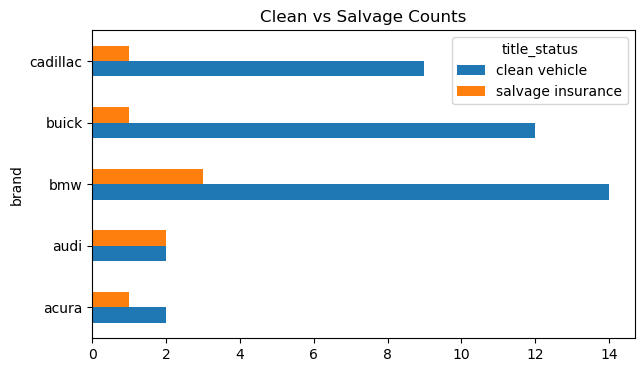

In [165]:
# выведем данные с помощью графики
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'count').round(2).head(5).plot.barh(figsize =( 7, 4), title = 'Clean vs Salvage Counts');

__метод .unstack()__

In [166]:
# с помощью данного методы мы как бы лишаем таблицу второго измерения, группировки по столбцам
# остается только группировка по строкам как в методе .groupby
pd.pivot_table(cars,
               index = 'brand',
               columns = 'title_status',
               values = 'price',
               aggfunc = 'median').round(2).head().unstack()

title_status       brand   
clean vehicle      acura       10400.0
                   audi        27950.0
                   bmw         31600.0
                   buick       20802.5
                   cadillac    24500.0
salvage insurance  acura        1000.0
                   audi           12.5
                   bmw          1825.0
                   buick           0.0
                   cadillac        0.0
dtype: float64

In [168]:
# создадим маску для автомобилей BMW
bmw = cars[cars['brand'] == 'bmw'].copy()
# установим новый индекс, удалив при этом старый
bmw.reset_index(drop = True, inplace = True)
# удалим столбец brand, тк осталась одно марка
bmw.drop(columns = 'brand', inplace = True)
bmw.head(5)

,price,model,year,title_status,mileage,color,state,country
0,29400,x3,2017,clean vehicle,23765.0,black,tennessee,usa
1,24500,door,2017,clean vehicle,17626.0,gray,michigan,usa
2,53500,m,2017,clean vehicle,29355.0,blue,michigan,usa
3,39000,series,2016,clean vehicle,39917.0,blue,michigan,usa
4,40000,series,2016,clean vehicle,31727.0,gray,michigan,usa


In [169]:
# сгруппируем данные по штату и году выпуска, передав их в параметр index и найдем медианну цены
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2)

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

In [170]:
# когда грппировка выполняется только по строкам, мы можем получить 
# аналогичный вариант с помощью метода groupby() 
bmw.groupby(by = ['state', 'year'])[['price']].agg('median')

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

__метод .query()__ - позволяет отфильтровывать данные

In [171]:
# выберем те штаты и года выпуска, вкоторых медианная цена была выше 20000
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2).query('price > 20000')

price
state      year         
california 2017  39800.0
           2020  61200.0
michigan   2016  39000.0
           2017  39000.0
tennessee  2017  29400.0
texas      2016  29700.0
wisconsin  2017  26600.0

__метод .style.bar()__

In [173]:
pd.pivot_table(bmw,
               index = ['state', 'year'],
               values = 'price',
               aggfunc = 'median').round(2).style.bar(color = '#3283a8')